<a href="https://colab.research.google.com/github/Chicken2322/Covid-Cases-in-India-Projection/blob/main/Covid_19_Projection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pmdarima

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import numpy as np
from pmdarima.arima import auto_arima
import warnings
warnings.filterwarnings('ignore')



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
dataset_confirmed = r'/content/drive/MyDrive/Minor Project 2/time_series_covid19_confirmed_global.csv'
dataset_death = r'/content/drive/MyDrive/Minor Project 2/time_series_covid19_deaths_global.csv'
dataset_recovered = r'/content/drive/MyDrive/Minor Project 2/time_series_covid19_recovered_global.csv'
dataset_country_cases = r'/content/drive/MyDrive/Minor Project 2/cases_country.csv'

In [4]:
confirmed_df = pd.read_csv(dataset_confirmed)
print(confirmed_df.shape)
recovered_df = pd.read_csv(dataset_recovered)
print(recovered_df.shape)
death_df = pd.read_csv(dataset_death)
print(death_df.shape)
cases_country_df = pd.read_csv(dataset_country_cases)
print(cases_country_df.shape)

(271, 315)
(256, 315)
(271, 315)
(191, 14)


In [5]:
confirmed_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '11/18/20', '11/19/20', '11/20/20', '11/21/20', '11/22/20', '11/23/20',
       '11/24/20', '11/25/20', '11/26/20', '11/27/20'],
      dtype='object', length=315)

In [6]:
confirmed_df.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,40287,40357,40510,40626,40687,40768,40833,40937,41032,41145,41268,41334,41425,41501,41633,41728,41814,41935,41975,42033,42092,42297,42463,42609,42795,42969,43035,43240,43403,43628,43851,44228,44443,44503,44706,44988,45280,45490,45716,45839
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,17350,17651,17948,18250,18556,18858,19157,19445,19729,20040,20315,20634,20875,21202,21523,21904,22300,22721,23210,23705,24206,24731,25294,25801,26211,26701,27233,27830,28432,29126,29837,30623,31459,32196,32761,33556,34300,34944,35600,36245
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,54616,54829,55081,55357,55630,55880,56143,56419,56706,57026,57332,57651,57942,58272,58574,58979,59527,60169,60800,61381,62051,62693,63446,64257,65108,65975,66819,67679,68589,69591,70629,71652,72755,73774,74862,75867,77000,78025,79110,80168
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3623,3623,3811,3811,4038,4038,4038,4325,4410,4517,4567,4665,4756,4825,4888,4910,5045,5135,5135,5319,5383,5437,5477,5567,5616,5725,5725,5872,5914,5951,6018,6066,6142,6207,6256,6304,6351,6428,6534,6610
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7829,8049,8338,8582,8829,9026,9381,9644,9871,10074,10269,10558,10805,11035,11228,11577,11813,12102,12223,12335,12433,12680,12816,12953,13053,13228,13374,13451,13615,13818,13922,14134,14267,14413,14493,14634,14742,14821,14920,15008
5,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,119,119,122,122,122,124,124,124,124,124,124,127,128,128,128,128,130,130,130,131,131,131,131,131,131,133,134,134,134,134,139,139,139,139,139,139,139,140,141,141
6,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1002662,1018999,1037325,1053650,1069368,1081336,1090589,1102301,1116609,1130533,1143800,1157179,1166924,1173533,1183131,1195276,1205928,1217028,1228814,1236851,1242182,1250499,1262476,1273356,1284519,1296378,1304846,1310491,1318384,1329005,1339337,1349434,1359042,1366182,1370366,1374631,1381795,1390388,1399431,1407277
7,NaN,Armenia,40.06910,45.038200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,65460,66694,68530,70836,73310,75523,77837,78810,80410,82651,85034,87432,89813,92254,93448,94776,97150,99563,101773,104249,106424,107466,108687,110548,112680,114383,115855,117337,117886,118870,120459,121979,123646,124839,126224,126709,127522,129085,130870,132346
8,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,113,113,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,115,115,115,115,115,115,115,115,115,116,117
9,New South Wales,Australia,-33.86880,151.209300,0,0,0,0,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,...,4347,4357,4363,4370,4375,4382,4386,4398,4406,4411,4417,4421,4425,4432,4435,4443,4445,4454,4459,4462,4469,4469,4469,4469

In [7]:
cases_country_df.columns

Index(['Country_Region', 'Last_Update', 'Lat', 'Long_', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'Incident_Rate', 'People_Tested',
       'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3'],
      dtype='object')

In [8]:
global_data = cases_country_df.copy().drop(['Lat','Long_','Country_Region','Last_Update','Incident_Rate','People_Tested','People_Hospitalized','Mortality_Rate','UID','ISO3'],axis=1)

In [9]:
global_data.columns

Index(['Confirmed', 'Deaths', 'Recovered', 'Active'], dtype='object')

In [10]:
global_summary = pd.DataFrame(global_data.sum()).transpose()

In [11]:
global_summary.style.format("{: ,.0f}")

,Confirmed,Deaths,Recovered,Active
0,"61,707,636","1,443,673","39,491,151","20,772,812"


In [12]:
confirmed_ts_summary = confirmed_df.copy().drop(['Province/State', 'Country/Region', 'Lat', 'Long'],axis=1).sum()

In [14]:
fig = go.Figure(data = go.Scatter(x=confirmed_ts_summary.index , y=confirmed_ts_summary.values , mode ='lines+markers' ))
fig.update_layout(title = 'Total Coronavirus Confirmed Cases (Globally)', yaxis_title='Confirmed Cases',xaxis_tickangle = 315)
fig.show()

In [15]:
confirmed_agg_ts = confirmed_df.copy().drop(['Province/State', 'Country/Region', 'Lat', 'Long'],axis=1).sum()
death_agg_ts = death_df.copy().drop(['Province/State', 'Country/Region', 'Lat', 'Long'],axis=1).sum()
recovered_agg_ts = recovered_df.copy().drop(['Province/State', 'Country/Region', 'Lat', 'Long'],axis=1).sum()

active_agg_ts = pd.Series(
    data = np.array(
        [x1 - x2 - x3 for (x1,x2,x3) in zip(confirmed_agg_ts.values,death_agg_ts.values,recovered_agg_ts.values)]),
        index = confirmed_agg_ts.index
)

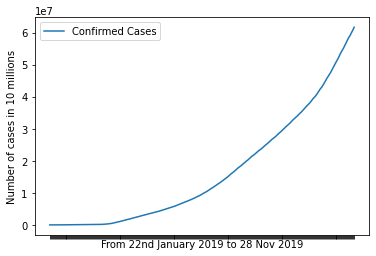

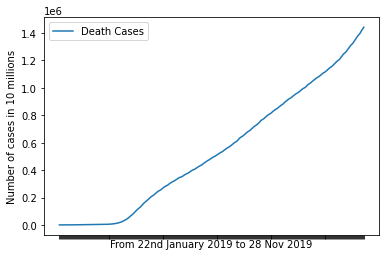

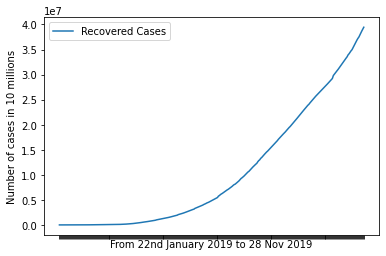

In [44]:
e = plt.figure(1)
plt.xlabel('From 22nd January 2019 to 28 Nov 2019')
plt.ylabel('Number of cases in 10 millions')
plt.plot(confirmed_agg_ts, label='Confirmed Cases')
plt.tick_params(labelbottom=False)
plt.legend()
e.show()

f = plt.figure(2)

plt.xlabel('From 22nd January 2019 to 28 Nov 2019')
plt.ylabel('Number of cases in 10 millions')
plt.plot(death_agg_ts, label='Death Cases')
plt.tick_params(labelbottom=False)
plt.legend()

f.show()

g = plt.figure(3)

plt.xlabel('From 22nd January 2019 to 28 Nov 2019')
plt.ylabel('Number of cases in 10 millions')
plt.plot(recovered_agg_ts, label='Recovered Cases')
plt.tick_params(labelbottom=False)
plt.legend()

g.show()

In [ ]:
plt.figure(figsize=(20,8))
plt.xlabel('From 22nd January 2019 to 28 Nov 2019')
plt.ylabel('Number of cases in 10 millions')
plt.plot(confirmed_agg_ts, label='Confirmed Cases')
plt.plot(death_agg_ts, label='Death Cases')
plt.plot(recovered_agg_ts, label='Recovered Cases')
plt.plot(active_agg_ts, label='Active Cases')
plt.tick_params(labelbottom=False)
plt.legend()
plt.show()

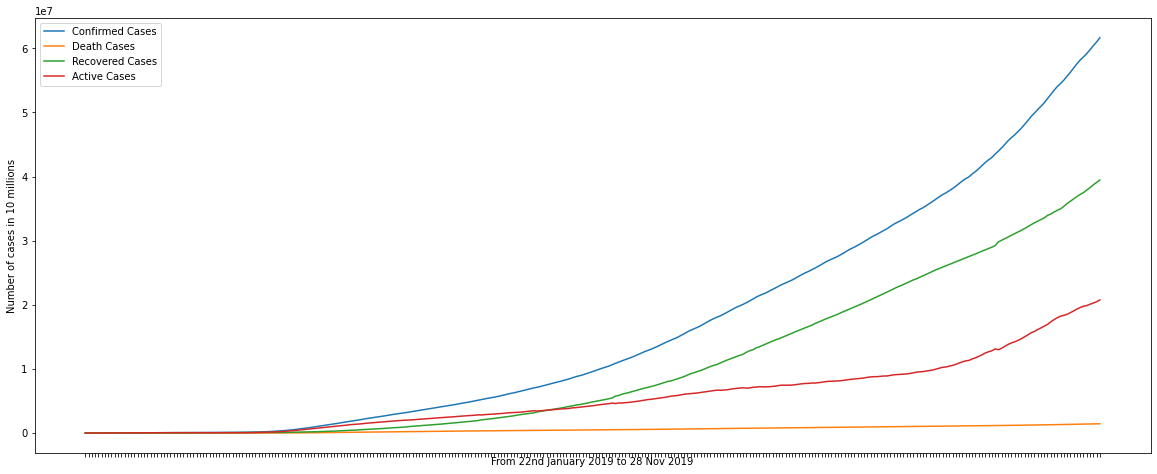

In [16]:
plt.figure(figsize=(20,8))
plt.xlabel('From 22nd January 2019 to 28 Nov 2019')
plt.ylabel('Number of cases in 10 millions')
plt.plot(confirmed_agg_ts, label='Confirmed Cases')
plt.plot(death_agg_ts, label='Death Cases')
plt.plot(recovered_agg_ts, label='Recovered Cases')
plt.plot(active_agg_ts, label='Active Cases')
plt.tick_params(labelbottom=False)
plt.legend()
plt.show()

In [17]:
cases_country_df.copy().drop(['Lat','Long_','Last_Update','Incident_Rate','People_Tested','People_Hospitalized','Mortality_Rate','UID','ISO3'],axis=1).sort_values('Confirmed',ascending=False).reset_index(drop=True).style.bar(align="left",width=98,color='#d65f5f')

,Country_Region,Confirmed,Deaths,Recovered,Active
0,US,13091757.000000,264859.000000,4947446.000000,7879452.000000
1,India,9351109.000000,136200.000000,8759969.000000,454940.000000
2,Brazil,6238350.000000,171974.000000,5581436.000000,484940.000000
3,France,2248209.000000,51999.000000,165493.000000,2030717.000000
4,Russia,2223500.000000,38676.000000,1724416.000000,460408.000000
5,Spain,1628208.000000,44668.000000,150376.000000,1433164.000000
6,United Kingdom,1593250.000000,57648.000000,3462.000000,1532140.000000
7,Italy,1538217.000000,53677.000000,696647.000000,787893.000000
8,Argentina,1407277.000000,38216.000000,1235257.000000,133804.000000
9,Colombia,1290510.000000,36214.000000,1189499.000000,64797.000000


In [18]:
confirmed_India_ts = confirmed_df[confirmed_df['Country/Region']=='India']
confirmed_India_ts = confirmed_India_ts.drop(
    ['Province/State', 'Country/Region', 'Lat', 'Long'],axis=1).reset_index(drop=True).sum()

recovered_India_ts = recovered_df[recovered_df['Country/Region']=='India']
recovered_India_ts = recovered_India_ts.drop(
    ['Province/State', 'Country/Region', 'Lat', 'Long'],axis=1).reset_index(drop=True).sum()

death_India_ts = death_df[death_df['Country/Region']=='India']
death_India_ts = death_India_ts.drop(
    ['Province/State', 'Country/Region', 'Lat', 'Long'],axis=1).reset_index(drop=True).sum()


active_India_ts = pd.Series(
    data = np.array(
        [x1 - x2 - x3 for (x1,x2,x3) in zip(confirmed_India_ts.values,death_India_ts.values,recovered_India_ts.values)]),
        index = confirmed_India_ts.index
)

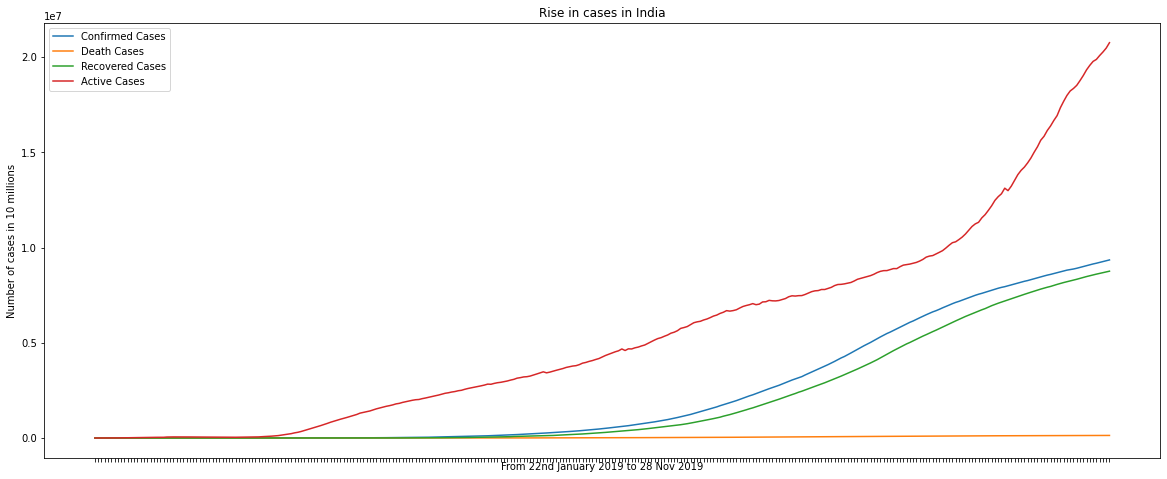

In [19]:
plt.figure(figsize=(20,8))
plt.xlabel('From 22nd January 2019 to 28 Nov 2019')
plt.ylabel('Number of cases in 10 millions')
plt.title('Rise in cases in India')
plt.plot(confirmed_India_ts, label='Confirmed Cases')
plt.plot(death_India_ts, label='Death Cases')
plt.plot(recovered_India_ts, label='Recovered Cases')
plt.plot(active_agg_ts, label='Active Cases')
plt.tick_params(labelbottom=False)
plt.legend()
plt.show()

In [20]:
data = pd.DataFrame({'Date':confirmed_India_ts.index, 'Cases':confirmed_India_ts.values})

In [21]:
data.columns

Index(['Date', 'Cases'], dtype='object')

In [23]:
data.Date = pd.to_datetime(data.Date)    

In [42]:
length = 280

In [43]:
train = data[:length]
valid = data[length:]

training = train['Cases']
validation = valid['Cases']

model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

forecast_data = model.predict(n_periods=validation.size)
forecast_data = pd.DataFrame(forecast_data,index = valid.index,columns=['Prediction'])


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=4.16 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=5667.426, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=5291.907, Time=1.30 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=5518.175, Time=0.41 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=5412.772, Time=0.07 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=inf, Time=4.28 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=3.03 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=1.08 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=6.57 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=5618.068, Time=0.15 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=5293.555, Time=2.04 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=5293.368, Time=2.21 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=5494.899, Time=1.25 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=5305.387, Time=1.89 sec
 ARIMA(1,1,0)(1,1,0)[12] intercept   : AIC=5

In [38]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  200
Model:             SARIMAX(3, 1, 3)x(0, 1, [1, 2], 12)   Log Likelihood               -1607.180
Date:                                 Sat, 28 Nov 2020   AIC                           3232.360
Time:                                         12:49:22   BIC                           3261.440
Sample:                                              0   HQIC                          3244.143
                                                 - 200                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.2414      0.029     76.872      0.000       2.184       2.299
ar.L2         -2.2414      0.053    -42.049      0.000      -2.346      -2.137
ar.L3          1.0000      0.025     39.640      0.000       0.951       1.049
ma.L1         -1.5973      0.062    -25.715      0.000      -1.719      -1.476
ma.L2          1.3195      0.080     16.398      0.000       1.162       1.477
ma.L3         -0.3255      0.041     -7.919      0.000      -0.406      -0.245
ma.S.L12      -0.7985      0.054    -14.838      0.000      -0.904      -0.693
ma.S.L24       0.4787      0.120      3.985      0.000       0.243       0.714
sigma2      1.636e+06    9.3e-08   1.76e+13      0.000    1.64e+06    1.64e+06
===================================================================================
Ljung-Box (Q):                       48.72   Jarque-Bera (JB):               945.04
Prob(Q):                              0.16   Prob(JB):                         0.00
Heteroskedasticity (H):             466.54   Skew:                             1.55
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.67e+28. Standard errors may be unstable.
"""

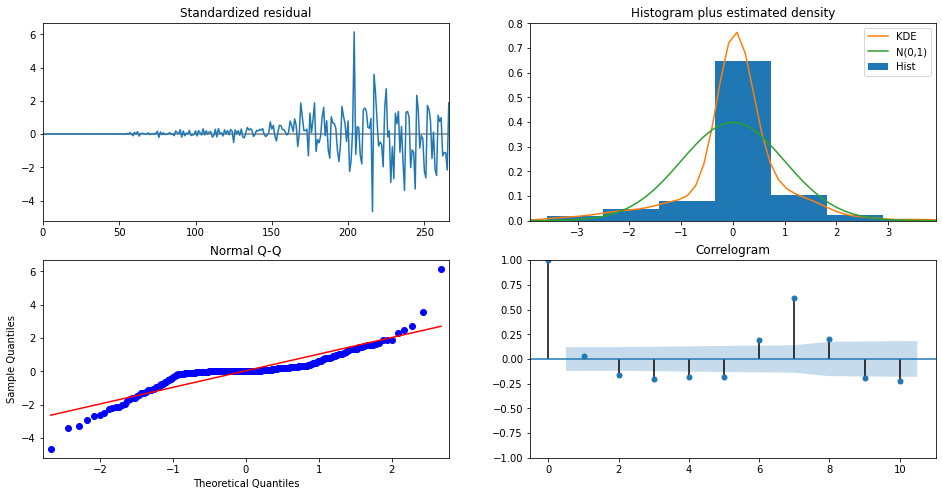

In [45]:
model.plot_diagnostics(figsize=(16,8))
plt.show()

In [47]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Cases'])-np.array(forecast_data['Prediction'])),2)))
print("RMS value from ARIMA Model {}".format(rms))

RMS value from ARIMA Model 51633.68510440721


<Figure size 432x288 with 0 Axes>

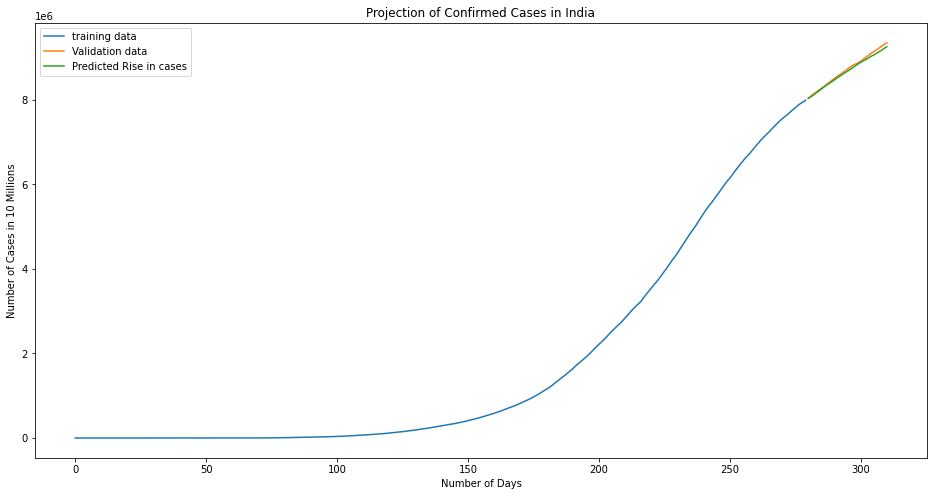

In [46]:
#plotting prediction we did using ARIMA models
plt.clf()
plt.figure(figsize=(16,8))
plt.plot(train['Cases'],label="training data")
plt.plot(valid['Cases'],label="Validation data")
plt.plot(forecast_data['Prediction'],label="Predicted Rise in cases")
plt.xlabel("Number of Days")
plt.ylabel("Number of Cases in 10 Millions")
plt.title("Projection of Confirmed Cases in India")
plt.legend(loc="upper left")
plt.show()